In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None # to supress dataframe warning

%matplotlib inline

In [2]:
df = pd.read_csv("Telco_customer_churn_processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [3]:
df.drop(['CustomerID', 'Count', 'Country', 'State','Lat Long',
       'Churn Score', 'CLTV'],axis=1,inplace = True)
df_copy = df.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our data analysis won't be able to directly take in those features as inputs.

In [4]:
df["Senior Citizen"] = np.where(df["Senior Citizen"] == "Yes",1,0)
df["Partner"] = np.where(df["Partner"] == "Yes",1,0)
df["Dependents"] = np.where(df["Dependents"] == "Yes",1,0)
df["Phone Service"] = np.where(df["Phone Service"] == "Yes",1,0)
df["Multiple Lines"] = np.where(df["Multiple Lines"] == "Yes",1,0)
df["Online Security"] = np.where(df["Online Security"] == "Yes",1,0)
df["Online Backup"] = np.where(df["Online Backup"] == "Yes",1,0)
df["Device Protection"] = np.where(df["Device Protection"] == "Yes",1,0)
df["Tech Support"] = np.where(df["Tech Support"]  == "Yes",1,0)
df["Streaming TV"] = np.where(df["Streaming TV"] == "Yes",1,0)
df["Streaming Movies"] = np.where(df["Streaming Movies"] == "Yes",1,0)
df["Paperless Billing"] = np.where(df["Paperless Billing"] == "Yes",1,0)
df["Total Charges"] = pd.to_numeric(df['Total Charges'],errors='coerce')
df["Internet Service"] = np.where(df["Internet Service"] == "No",0,1)

In [5]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)
Contract = pd.get_dummies(df['Contract'],drop_first=True)
df.drop(['Contract','Payment Method'],axis=1,inplace=True)
df = pd.concat([df,Gender,Contract],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(['City','Gender'],axis=1,inplace=True)
df.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Male', 'One year', 'Two year'],
      dtype='object')

# Spliting dataset into Train and Test

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Zip Code','Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Male', 'One year', 'Two year']]
y = df['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=64)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

def metrics(y_test, predictions):
    
    print(classification_report(y_test,predictions))
    print("####### Confusion Matrix\n",confusion_matrix(y_test,predictions))
    
    TN = confusion_matrix(y_test,predictions)[0][0]
    FP = confusion_matrix(y_test,predictions)[0][1]
    FN = confusion_matrix(y_test,predictions)[1][0]
    TP = confusion_matrix(y_test,predictions)[1][1]
    
    TPR = round(TP/(TP + FN),3)
    TNR = round(TN/(TN + FP),3)
    Accuracy = round((TN+TP)/ (len(y_test)),4)
    
    from sklearn import metrics
    print('\nMAE:', round(metrics.mean_absolute_error(y_test, predictions),4))
    print('MSE:', round(metrics.mean_squared_error(y_test, predictions),4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),4))

    return TPR, TNR, Accuracy

In [11]:
def cross_validate(e, X_train,  y_train):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = e, X = X_train, y = y_train, cv = 10)
    print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
    
    return accuracies.mean()*100

# Classification methods

In [12]:
############################## LogisticRegression ##############################
from sklearn.linear_model import LogisticRegression

def log_reg(X_train, y_train, X_test, y_test):
    print("\n############################## LogisticRegression ##############################\n")
    
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    lg_predict = logmodel.predict(X_test)
    TPR, TNR, log_accuracy = metrics(y_test, lg_predict)
    log_avg_accuracy = cross_validate(logmodel, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(log_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(log_avg_accuracy))

    return log_accuracy, log_avg_accuracy

log_accuracy, log_avg_accuracy = log_reg(X_train, y_train, X_test, y_test)


############################## LogisticRegression ##############################

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2532
           1       0.67      0.43      0.52       984

    accuracy                           0.78      3516
   macro avg       0.73      0.67      0.69      3516
weighted avg       0.77      0.78      0.76      3516

####### Confusion Matrix
 [[2321  211]
 [ 565  419]]

MAE: 0.2207
MSE: 0.2207
RMSE: 0.4698

Standard Deviation: 1.55 %

TPR = 0.426 
TNR = 0.917 
Accuracy = 77.93%

Average Accuracy using 10-fold Cross validation = 79.69%


In [13]:
############################## DecisionTree ##############################
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def d_tree(X_train, y_train, X_test, y_test):
    print("\n############################## DecisionTree ##############################\n")

    dtree = DecisionTreeClassifier(criterion ="entropy",random_state=64)
    dtree.fit(X_train,y_train)
    d_predict = dtree.predict(X_test)

    TPR, TNR, dtree_accuracy = metrics(y_test, d_predict)
    dtree_avg_accuracy = cross_validate(dtree, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(dtree_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(dtree_avg_accuracy))
    
    return dtree, dtree_accuracy, dtree_avg_accuracy

dtree, dtree_accuracy, dtree_avg_accuracy = d_tree(X_train, y_train, X_test, y_test)


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2532
           1       0.54      0.50      0.52       984

    accuracy                           0.74      3516
   macro avg       0.67      0.67      0.67      3516
weighted avg       0.73      0.74      0.74      3516

####### Confusion Matrix
 [[2109  423]
 [ 493  491]]

MAE: 0.2605
MSE: 0.2605
RMSE: 0.5104

Standard Deviation: 1.75 %

TPR = 0.499 
TNR = 0.833 
Accuracy = 73.95%

Average Accuracy using 10-fold Cross validation = 74.18%


In [14]:
############################## RandomForest ##############################
from sklearn.ensemble import RandomForestClassifier

error_rate = []
best_combo = []
for i in range(1,21):
    for j in range(1,11):
        rfc_test = RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=j,random_state=64)
        rfc_test.fit(X_train, y_train)
        rfct_pred = rfc_test.predict(X_test) 
        error_rate.append((np.mean(rfct_pred != y_test)))
        best_combo.append([i,j])
        
print("\nBest Combination =",best_combo[error_rate.index(min(error_rate))] )
print("")
n = best_combo[error_rate.index(min(error_rate))][0]
d = best_combo[error_rate.index(min(error_rate))][1]

def rand_forest(X_train, y_train, X_test, y_test):
    
    print("\n############################## RandomForest ##############################")
    rfc = RandomForestClassifier(n_estimators=n,criterion='entropy',max_depth=d,random_state=64)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    TPR, TNR, rf_accuracy = metrics(y_test, rfc_pred)
    rf_avg_accuracy = cross_validate(rfc, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(rf_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(rf_avg_accuracy))
    
    return rfc, rf_accuracy, rf_avg_accuracy

rfc, rf_accuracy, rf_avg_accuracy = rand_forest(X_train, y_train, X_test, y_test)


Best Combination = [19, 8]


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2532
           1       0.72      0.47      0.57       984

    accuracy                           0.80      3516
   macro avg       0.77      0.70      0.72      3516
weighted avg       0.79      0.80      0.79      3516

####### Confusion Matrix
 [[2357  175]
 [ 524  460]]

MAE: 0.1988
MSE: 0.1988
RMSE: 0.4459

Standard Deviation: 1.16 %

TPR = 0.467 
TNR = 0.931 
Accuracy = 80.12%

Average Accuracy using 10-fold Cross validation = 80.40%


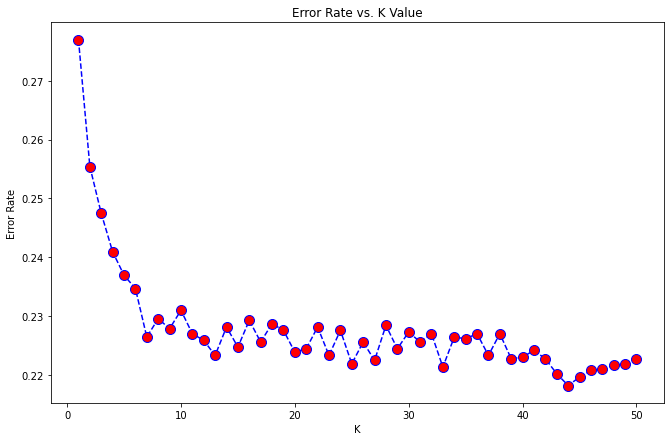

In [15]:
############################## KNeighbors ##############################
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
# Will take some time
for i in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(11,7))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [16]:
print("\n############################## KNeighbors ##############################")
best_k = error_rate.index((min(error_rate))) + 1
worst_k = error_rate.index((max(error_rate))) + 1

print("\nBest K is",best_k)
print("Worst K is",worst_k)

def KNeighbors(best_k, X_train_scaled, y_train, X_test_scaled, y_test):
    knn = KNeighborsClassifier(n_neighbors = best_k,)
    knn.fit(X_train_scaled,y_train)
    k_pred = knn.predict(X_test_scaled)

    TPR, TNR, knn_accuracy = metrics(y_test, k_pred)
    knn_avg_accuracy = cross_validate(knn, X_train_scaled,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(knn_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(knn_avg_accuracy))
    
    return knn_accuracy, knn_avg_accuracy
knn_accuracy, knn_avg_accuracy = KNeighbors(best_k, X_train_scaled, y_train, X_test_scaled, y_test)


############################## KNeighbors ##############################

Best K is 44
Worst K is 1
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2532
           1       0.65      0.47      0.55       984

    accuracy                           0.78      3516
   macro avg       0.73      0.69      0.70      3516
weighted avg       0.77      0.78      0.77      3516

####### Confusion Matrix
 [[2283  249]
 [ 518  466]]

MAE: 0.2181
MSE: 0.2181
RMSE: 0.4671

Standard Deviation: 1.06 %

TPR = 0.474 
TNR = 0.902 
Accuracy = 78.19%

Average Accuracy using 10-fold Cross validation = 78.61%


In [17]:
############################## GaussianNB ##############################
from sklearn.naive_bayes import GaussianNB

def Gaussian_NB(X_train, y_train, X_test, y_test):
    print("\n############################## GaussianNB ##############################\n")

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)

    TPR, TNR, nb_accuracy = metrics(y_test, nb_pred)
    nb_avg_accuracy = cross_validate(nb, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(nb_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(nb_avg_accuracy))
    
    return nb_accuracy, nb_avg_accuracy

nb_accuracy, nb_avg_accuracy = Gaussian_NB(X_train, y_train, X_test, y_test)


############################## GaussianNB ##############################

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2532
           1       0.55      0.76      0.64       984

    accuracy                           0.76      3516
   macro avg       0.72      0.76      0.73      3516
weighted avg       0.80      0.76      0.77      3516

####### Confusion Matrix
 [[1929  603]
 [ 235  749]]

MAE: 0.2383
MSE: 0.2383
RMSE: 0.4882

Standard Deviation: 1.40 %

TPR = 0.761 
TNR = 0.762 
Accuracy = 76.17%

Average Accuracy using 10-fold Cross validation = 75.65%


# Model Improvement

In [18]:
############################## DecisionTree Using Max Depth of Best RandomForest ##############################
def d_tree_m(d, X_train, y_train, X_test, y_test):
    print("\n########################## DecisionTree Using Max Depth of Best RandomForest ##########################\n")

    dtree_m = DecisionTreeClassifier(ccp_alpha=0.002, criterion ="entropy",max_depth=d,)
    dtree_m.fit(X_train, y_train)
    d_predict = dtree_m.predict(X_test)

    TPR, TNR, accuracy = metrics(y_test, d_predict)
    avg_accuracy = cross_validate(dtree_m, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(avg_accuracy))
    print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
    
    return accuracy, avg_accuracy

accuracy_m, avg_accuracy_m = d_tree_m(d, X_train, y_train, X_test, y_test)


########################## DecisionTree Using Max Depth of Best RandomForest ##########################

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2532
           1       0.61      0.65      0.63       984

    accuracy                           0.79      3516
   macro avg       0.74      0.75      0.74      3516
weighted avg       0.79      0.79      0.79      3516

####### Confusion Matrix
 [[2129  403]
 [ 342  642]]

MAE: 0.2119
MSE: 0.2119
RMSE: 0.4603

Standard Deviation: 1.19 %

TPR = 0.652 
TNR = 0.841 
Accuracy = 78.81%

Average Accuracy using 10-fold Cross validation = 78.61%

Accuracy changed by 4.86pp


# Using AdaBoost

In [19]:
def ada_boost(d, X_train, y_train,X_test, y_test):
    error_rate = []
    from sklearn.ensemble import AdaBoostClassifier
    
    for i in range(1,16):
        for j in (0.5,1):
            ada = AdaBoostClassifier(n_estimators =i , base_estimator = d , learning_rate = j, random_state=64)  
            ada.fit(X_train, y_train)
            ada_predict = ada.predict(X_test)
            error_rate.append(np.mean(ada_predict != y_test ))
            
    return error_rate, ada_predict

In [20]:
def create_dataframe(error_rate):
    
    df_temp = pd.DataFrame()
    df_temp["N"] = list(range(1,31))
    df_temp["Error_Rate"] = error_rate
    df_temp["Learning_Rate"] = np.where(df_temp.N <=15, 0.5,1)
    df_temp["N"] = list(range(1,16)) * 2
    
    return df_temp

In [21]:
from sklearn.ensemble import AdaBoostClassifier

def ada_main(e, X_train, y_train,X_test, y_test):
    error_rate, ada_predict = ada_boost(e , X_train, y_train,X_test, y_test)

    df_temp = create_dataframe(error_rate)

    best_lr =  df_temp.nsmallest(1,"Error_Rate").iloc[0][2]
    best_n = df_temp.nsmallest(1,"Error_Rate").iloc[0][0]

    ar_accuracy = ((1 - df_temp.nsmallest(1,"Error_Rate").iloc[0][1]))
    print(f"\nBest combination for learning rate λ and N is [{best_lr }, {best_n}] with Accuracy = {round(ar_accuracy*100,2)}%")
    print(f"\nAccuracy changed by {round((ar_accuracy - rf_accuracy)*100,2)}pp")

    ada = AdaBoostClassifier(n_estimators = int(best_n) , base_estimator = e , learning_rate = best_lr, random_state=64)  
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    TPR, TNR, ada_accuracy = metrics(y_test, ada_predict)
    print(f"\nTPR = {TPR} \nTNR = {TNR}")

In [22]:
print("\n######## AdaBoost with Best Performing Algorithm")
ada_main(rfc, X_train, y_train, X_test, y_test)


######## AdaBoost with Best Performing Algorithm

Best combination for learning rate λ and N is [0.5, 4.0] with Accuracy = 80.43%

Accuracy changed by 0.31pp
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2532
           1       0.72      0.49      0.59       984

    accuracy                           0.80      3516
   macro avg       0.77      0.71      0.73      3516
weighted avg       0.80      0.80      0.79      3516

####### Confusion Matrix
 [[2341  191]
 [ 497  487]]

MAE: 0.1957
MSE: 0.1957
RMSE: 0.4424

TPR = 0.495 
TNR = 0.925


In [23]:
print("\n######## AdaBoost with Worst Performing Algorithm")
ada_main(None, X_train, y_train, X_test, y_test)


######## AdaBoost with Worst Performing Algorithm

Best combination for learning rate λ and N is [1.0, 15.0] with Accuracy = 79.44%

Accuracy changed by -0.68pp
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2532
           1       0.67      0.52      0.58       984

    accuracy                           0.79      3516
   macro avg       0.75      0.71      0.72      3516
weighted avg       0.78      0.79      0.79      3516

####### Confusion Matrix
 [[2284  248]
 [ 475  509]]

MAE: 0.2056
MSE: 0.2056
RMSE: 0.4535

TPR = 0.517 
TNR = 0.902


In [24]:
############################## GradientBoostingClassifier ##############################
print("\n########################## GradientBoostingClassifier ##########################\n")
def grad_boost(X_train, y_train,X_test, y_test):
    error_rate = []
    from sklearn.ensemble import GradientBoostingClassifier
    
    for i in range(1,51):
        for j in np.linspace(0.1,1,10):
            gb = GradientBoostingClassifier(n_estimators=i, learning_rate=j, random_state=64) 
            gb.fit(X_train, y_train)
            gd_predict = gb.predict(X_test)
            error_rate.append(np.mean(gd_predict != y_test ))
            
    return min(error_rate), gd_predict

error_rate, gd_predict = grad_boost(X_train, y_train,X_test, y_test)
print(f"Accuracy using GradientBoosting {round((1 - error_rate) * 100, 2)}%")


########################## GradientBoostingClassifier ##########################

Accuracy using GradientBoosting 80.66%


# Dimensionality Reduction
### In this part we will cover the following Feature Extraction techniques:
    1. Principal Component Analysis (PCA)
    2. Linear Discriminant Analysis (LDA)
    3. Quadratic Discriminant Analysis (QDA)

In [25]:
############################## PrincipalComponentAnalysis ##############################
print("\n############################## PrincipalComponentAnalysis ##############################\n")

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=64)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nExplained Variance Ratio:",pca.explained_variance_ratio_)
print("Noise Variance:",round(pca.noise_variance_,3))


############################## PrincipalComponentAnalysis ##############################


Explained Variance Ratio: [0.22724583 0.12357541]
Noise Variance: 0.714


In [26]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_pca, y_train, X_test_pca, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      2532
           1       0.52      0.06      0.11       984

    accuracy                           0.72      3516
   macro avg       0.63      0.52      0.47      3516
weighted avg       0.67      0.72      0.63      3516

####### Confusion Matrix
 [[2478   54]
 [ 925   59]]

MAE: 0.2784
MSE: 0.2784
RMSE: 0.5277

Standard Deviation: 0.56 %

TPR = 0.06 
TNR = 0.979 
Accuracy = 72.16%

Average Accuracy using 10-fold Cross validation = 74.37%

Accuracy changed by -7.96pp
Mean Accuracy changed by -6.0pp


In [27]:
print("\n######## PCA-AdaBoost")
ada_main(rfc, X_train_pca, y_train, X_test_pca, y_test)


######## PCA-AdaBoost

Best combination for learning rate λ and N is [0.5, 12.0] with Accuracy = 72.61%

Accuracy changed by -7.51pp
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      2532
           1       0.52      0.12      0.20       984

    accuracy                           0.72      3516
   macro avg       0.63      0.54      0.52      3516
weighted avg       0.68      0.72      0.66      3516

####### Confusion Matrix
 [[2423  109]
 [ 864  120]]

MAE: 0.2767
MSE: 0.2767
RMSE: 0.5261

TPR = 0.122 
TNR = 0.957


In [28]:
dtree, accuracy, avg_accuracy = d_tree(X_train_pca, y_train, X_test_pca, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2532
           1       0.35      0.32      0.33       984

    accuracy                           0.64      3516
   macro avg       0.55      0.54      0.54      3516
weighted avg       0.63      0.64      0.64      3516

####### Confusion Matrix
 [[1946  586]
 [ 670  314]]

MAE: 0.3572
MSE: 0.3572
RMSE: 0.5977

Standard Deviation: 2.34 %

TPR = 0.319 
TNR = 0.769 
Accuracy = 64.28%

Average Accuracy using 10-fold Cross validation = 64.76%

Accuracy changed by -9.67pp
Mean Accuracy changed by -9.4pp


In [29]:
print("\n######## PCA-AdaBoost")
ada_main(dtree, X_train_pca, y_train, X_test_pca, y_test)


######## PCA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 63.88%

Accuracy changed by -16.24pp
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2532
           1       0.34      0.32      0.33       984

    accuracy                           0.64      3516
   macro avg       0.54      0.54      0.54      3516
weighted avg       0.63      0.64      0.63      3516

####### Confusion Matrix
 [[1936  596]
 [ 674  310]]

MAE: 0.3612
MSE: 0.3612
RMSE: 0.601

TPR = 0.315 
TNR = 0.765


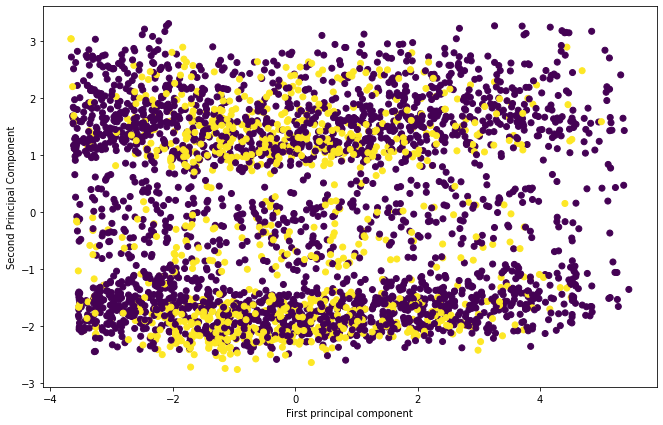

In [30]:
plt.figure(figsize=(11,7))
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c = (y_test))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

This heatmap represent the correlation between the various feature and the principal component itself.

<Figure size 792x504 with 0 Axes>

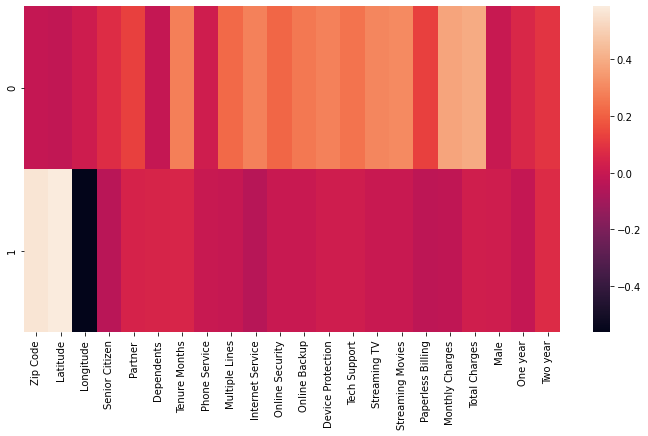

In [31]:
df_comp = pd.DataFrame(pca.components_,columns=X_test.columns)

plt.figure(figsize=(11,7))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)
plt.show()

In [32]:
############################## LinearDiscriminantAnalysis ##############################
print("\n############################## LinearDiscriminantAnalysis ##############################\n")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


############################## LinearDiscriminantAnalysis ##############################



In [33]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_lda, y_train, X_test_lda, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2532
           1       0.68      0.44      0.54       984

    accuracy                           0.79      3516
   macro avg       0.75      0.68      0.70      3516
weighted avg       0.77      0.79      0.77      3516

####### Confusion Matrix
 [[2330  202]
 [ 548  436]]

MAE: 0.2133
MSE: 0.2133
RMSE: 0.4619

Standard Deviation: 1.32 %

TPR = 0.443 
TNR = 0.92 
Accuracy = 78.67%

Average Accuracy using 10-fold Cross validation = 80.63%

Accuracy changed by -1.45pp
Mean Accuracy changed by 0.2pp


In [34]:
print("\n######## LDA-AdaBoost")
ada_main(rfc, X_train_lda, y_train, X_test_lda, y_test)


######## LDA-AdaBoost

Best combination for learning rate λ and N is [0.5, 3.0] with Accuracy = 79.47%

Accuracy changed by -0.65pp
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2532
           1       0.70      0.47      0.56       984

    accuracy                           0.79      3516
   macro avg       0.76      0.69      0.71      3516
weighted avg       0.78      0.79      0.78      3516

####### Confusion Matrix
 [[2333  199]
 [ 525  459]]

MAE: 0.2059
MSE: 0.2059
RMSE: 0.4538

TPR = 0.466 
TNR = 0.921


In [35]:
dtree, accuracy, avg_accuracy = d_tree(X_train_lda, y_train, X_test_lda, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2532
           1       0.54      0.47      0.50       984

    accuracy                           0.74      3516
   macro avg       0.67      0.66      0.66      3516
weighted avg       0.73      0.74      0.73      3516

####### Confusion Matrix
 [[2131  401]
 [ 517  467]]

MAE: 0.2611
MSE: 0.2611
RMSE: 0.511

Standard Deviation: 2.06 %

TPR = 0.475 
TNR = 0.842 
Accuracy = 73.89%

Average Accuracy using 10-fold Cross validation = 74.26%

Accuracy changed by -0.06pp
Mean Accuracy changed by 0.1pp


In [36]:
print("\n######## LDA-AdaBoost")
ada_main(dtree, X_train_lda, y_train, X_test_lda, y_test)


######## LDA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 73.89%

Accuracy changed by -6.23pp
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2532
           1       0.54      0.47      0.50       984

    accuracy                           0.74      3516
   macro avg       0.67      0.66      0.66      3516
weighted avg       0.73      0.74      0.73      3516

####### Confusion Matrix
 [[2131  401]
 [ 517  467]]

MAE: 0.2611
MSE: 0.2611
RMSE: 0.511

TPR = 0.475 
TNR = 0.842


In [37]:
############################## QuadraticDiscriminantAnalysis ##############################
print("\n############################## QuadraticDiscriminantAnalysis ##############################\n")

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda_classifier = QDA()
X_train_qda = qda_classifier.fit(X_train_scaled, y_train)
qda_predicted = qda_classifier.predict(X_test_scaled)

TPR, TNR, accuracy = metrics(y_test, qda_predicted)
print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")



############################## QuadraticDiscriminantAnalysis ##############################

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2532
           1       0.57      0.75      0.64       984

    accuracy                           0.77      3516
   macro avg       0.73      0.76      0.74      3516
weighted avg       0.80      0.77      0.78      3516

####### Confusion Matrix
 [[1967  565]
 [ 247  737]]

MAE: 0.2309
MSE: 0.2309
RMSE: 0.4806

TPR = 0.749 
TNR = 0.777 
Accuracy = 76.91%


# Feature Selection


In [38]:
############################## RecursiveFeatureElimination ##############################
print("\n############################## RecursiveFeatureElimination ##############################\n")

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logmodel = LogisticRegression(solver='lbfgs')
rfe = RFE(logmodel, 6)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

col = []
for i in range(0, len(fit.ranking_)):
    if fit.ranking_[i] != 1:
        a = list(X.columns)[i]
        col.append(a)
        
X_train_rfe = X_train.drop(col, axis= 1)
X_test_rfe = X_test.drop(col, axis= 1)


############################## RecursiveFeatureElimination ##############################

Num Features: 6
Selected Features: [False False False False False  True False False False  True  True False
 False  True False False False False False False  True  True]
Feature Ranking: [16 14 13  8 11  1 12  4  6  1  1  5  7  1  2 10  3  9 15 17  1  1]


In [39]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_rfe, y_train, X_test_rfe, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2532
           1       0.61      0.60      0.61       984

    accuracy                           0.78      3516
   macro avg       0.73      0.73      0.73      3516
weighted avg       0.78      0.78      0.78      3516

####### Confusion Matrix
 [[2153  379]
 [ 392  592]]

MAE: 0.2193
MSE: 0.2193
RMSE: 0.4683

Standard Deviation: 1.08 %

TPR = 0.602 
TNR = 0.85 
Accuracy = 78.07%

Average Accuracy using 10-fold Cross validation = 78.56%

Accuracy changed by -2.05pp
Mean Accuracy changed by -1.8pp


In [40]:
print("\n######## RFE-AdaBoost")
ada_main(rfc, X_train_rfe, y_train, X_test_rfe, y_test)


######## RFE-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.07%

Accuracy changed by -2.05pp
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2532
           1       0.61      0.60      0.61       984

    accuracy                           0.78      3516
   macro avg       0.73      0.73      0.73      3516
weighted avg       0.78      0.78      0.78      3516

####### Confusion Matrix
 [[2153  379]
 [ 392  592]]

MAE: 0.2193
MSE: 0.2193
RMSE: 0.4683

TPR = 0.602 
TNR = 0.85


In [41]:
dtree, accuracy, avg_accuracy = d_tree(X_train_rfe, y_train, X_test_rfe, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2532
           1       0.61      0.60      0.61       984

    accuracy                           0.78      3516
   macro avg       0.73      0.73      0.73      3516
weighted avg       0.78      0.78      0.78      3516

####### Confusion Matrix
 [[2153  379]
 [ 392  592]]

MAE: 0.2193
MSE: 0.2193
RMSE: 0.4683

Standard Deviation: 1.08 %

TPR = 0.602 
TNR = 0.85 
Accuracy = 78.07%

Average Accuracy using 10-fold Cross validation = 78.56%

Accuracy changed by 4.12pp
Mean Accuracy changed by 4.4pp


In [42]:
print("\n######## RFE-AdaBoost")
ada_main(dtree, X_train_rfe, y_train, X_test_rfe, y_test)


######## RFE-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.07%

Accuracy changed by -2.05pp
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2532
           1       0.61      0.60      0.61       984

    accuracy                           0.78      3516
   macro avg       0.73      0.73      0.73      3516
weighted avg       0.78      0.78      0.78      3516

####### Confusion Matrix
 [[2153  379]
 [ 392  592]]

MAE: 0.2193
MSE: 0.2193
RMSE: 0.4683

TPR = 0.602 
TNR = 0.85


In [43]:
############################## ANOVA Feature Selection ##############################
print("\n############################## ANOVA Feature Selection ##############################\n")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

afs = SelectKBest(score_func=f_classif, k=4)

X_train_k = afs.fit_transform(X_train, y_train)
X_test_k = afs.transform(X_test)


############################## ANOVA Feature Selection ##############################



In [44]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_k, y_train, X_test_k, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2532
           1       0.67      0.39      0.49       984

    accuracy                           0.78      3516
   macro avg       0.73      0.66      0.67      3516
weighted avg       0.76      0.78      0.75      3516

####### Confusion Matrix
 [[2344  188]
 [ 602  382]]

MAE: 0.2247
MSE: 0.2247
RMSE: 0.474

Standard Deviation: 1.60 %

TPR = 0.388 
TNR = 0.926 
Accuracy = 77.53%

Average Accuracy using 10-fold Cross validation = 77.02%

Accuracy changed by -2.59pp
Mean Accuracy changed by -3.4pp


In [45]:
print("\n######## ANOVA-AdaBoost")
ada_main(rfc, X_train_k, y_train, X_test_k, y_test)


######## ANOVA-AdaBoost

Best combination for learning rate λ and N is [0.5, 8.0] with Accuracy = 77.25%

Accuracy changed by -2.87pp
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2532
           1       0.63      0.37      0.47       984

    accuracy                           0.76      3516
   macro avg       0.71      0.64      0.66      3516
weighted avg       0.75      0.76      0.74      3516

####### Confusion Matrix
 [[2318  214]
 [ 617  367]]

MAE: 0.2363
MSE: 0.2363
RMSE: 0.4862

TPR = 0.373 
TNR = 0.915


In [46]:
dtree, accuracy, avg_accuracy = d_tree(X_train_k, y_train, X_test_k, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2532
           1       0.67      0.37      0.48       984

    accuracy                           0.77      3516
   macro avg       0.73      0.65      0.67      3516
weighted avg       0.76      0.77      0.75      3516

####### Confusion Matrix
 [[2350  182]
 [ 619  365]]

MAE: 0.2278
MSE: 0.2278
RMSE: 0.4773

Standard Deviation: 1.36 %

TPR = 0.371 
TNR = 0.928 
Accuracy = 77.22%

Average Accuracy using 10-fold Cross validation = 76.56%

Accuracy changed by 3.27pp
Mean Accuracy changed by 2.4pp


In [47]:
print("\n######## ANOVA-AdaBoost")
ada_main(dtree, X_train_k, y_train, X_test_k, y_test)


######## ANOVA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 77.22%

Accuracy changed by -2.9pp
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2532
           1       0.67      0.37      0.48       984

    accuracy                           0.77      3516
   macro avg       0.73      0.65      0.67      3516
weighted avg       0.76      0.77      0.75      3516

####### Confusion Matrix
 [[2350  182]
 [ 619  365]]

MAE: 0.2278
MSE: 0.2278
RMSE: 0.4773

TPR = 0.371 
TNR = 0.928


In [48]:
############################## Estimate Mutual Information ##############################
print("\n############################## Estimate Mutual Information ##############################\n")

from sklearn.feature_selection import mutual_info_classif

micf = mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=64)

col = []
for i in range(0, len(micf)):
    if micf[i] < 0.009 :
        a = list(X.columns)[i]
        col.append(a)
        
X_train_emi = X_train.drop(col, axis= 1)
X_test_emi = X_test.drop(col, axis= 1)


############################## Estimate Mutual Information ##############################



In [49]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_emi, y_train, X_test_emi, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2532
           1       0.71      0.46      0.56       984

    accuracy                           0.80      3516
   macro avg       0.76      0.69      0.71      3516
weighted avg       0.79      0.80      0.78      3516

####### Confusion Matrix
 [[2352  180]
 [ 535  449]]

MAE: 0.2034
MSE: 0.2034
RMSE: 0.451

Standard Deviation: 1.19 %

TPR = 0.456 
TNR = 0.929 
Accuracy = 79.66%

Average Accuracy using 10-fold Cross validation = 80.46%

Accuracy changed by -0.46pp
Mean Accuracy changed by 0.1pp


In [50]:
print("\n######## EMI-AdaBoost")
ada_main(rfc, X_train_emi, y_train, X_test_emi, y_test)


######## EMI-AdaBoost

Best combination for learning rate λ and N is [0.5, 4.0] with Accuracy = 80.06%

Accuracy changed by -0.06pp
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2532
           1       0.71      0.47      0.57       984

    accuracy                           0.80      3516
   macro avg       0.76      0.70      0.72      3516
weighted avg       0.79      0.80      0.78      3516

####### Confusion Matrix
 [[2341  191]
 [ 517  467]]

MAE: 0.2014
MSE: 0.2014
RMSE: 0.4487

TPR = 0.475 
TNR = 0.925


In [51]:
print("\n######## EMI-AdaBoost")
ada_main(dtree, X_train_emi, y_train, X_test_emi, y_test)


######## EMI-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 73.35%

Accuracy changed by -6.77pp
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      2532
           1       0.52      0.51      0.52       984

    accuracy                           0.73      3516
   macro avg       0.67      0.66      0.67      3516
weighted avg       0.73      0.73      0.73      3516

####### Confusion Matrix
 [[2078  454]
 [ 483  501]]

MAE: 0.2665
MSE: 0.2665
RMSE: 0.5162

TPR = 0.509 
TNR = 0.821


In [52]:
dtree, accuracy, avg_accuracy = d_tree(X_train_emi, y_train, X_test_emi, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2532
           1       0.52      0.51      0.52       984

    accuracy                           0.73      3516
   macro avg       0.67      0.67      0.67      3516
weighted avg       0.73      0.73      0.73      3516

####### Confusion Matrix
 [[2070  462]
 [ 478  506]]

MAE: 0.2673
MSE: 0.2673
RMSE: 0.5171

Standard Deviation: 2.32 %

TPR = 0.514 
TNR = 0.818 
Accuracy = 73.27%

Average Accuracy using 10-fold Cross validation = 74.12%

Accuracy changed by -0.68pp
Mean Accuracy changed by -0.1pp


In [53]:
############################## Feature Importance with Extra Trees Classifier ##############################
print("\n############################ Feature Importance with Extra Trees Classifier ############################\n")

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=10,random_state=64,criterion='entropy')
etc.fit(X_train, y_train)
print(etc.feature_importances_)

col = []
for i in range(0, len(etc.feature_importances_)):
    if etc.feature_importances_[i] >= 0.075 :
        a = list(X.columns)[i]
        col.append(a)
        
X_train_etc = X_train.drop(col, axis= 1)
X_test_etc = X_test.drop(col, axis= 1)


############################ Feature Importance with Extra Trees Classifier ############################

[0.07423162 0.07542177 0.0754239  0.02504943 0.0296428  0.04516676
 0.10774518 0.00900145 0.02591261 0.02512727 0.03233806 0.02741781
 0.0230056  0.02620102 0.0201574  0.02026755 0.03058425 0.10547192
 0.09694935 0.02857916 0.03297321 0.06333185]


In [54]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_etc, y_train, X_test_etc, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2532
           1       0.65      0.46      0.54       984

    accuracy                           0.78      3516
   macro avg       0.73      0.68      0.70      3516
weighted avg       0.77      0.78      0.77      3516

####### Confusion Matrix
 [[2288  244]
 [ 531  453]]

MAE: 0.2204
MSE: 0.2204
RMSE: 0.4695

Standard Deviation: 1.02 %

TPR = 0.46 
TNR = 0.904 
Accuracy = 77.96%

Average Accuracy using 10-fold Cross validation = 79.04%

Accuracy changed by -2.16pp
Mean Accuracy changed by -1.4pp


In [55]:
print("\n######## ETC-AdaBoost")
ada_main(rfc, X_train_etc, y_train, X_test_etc, y_test)


######## ETC-AdaBoost

Best combination for learning rate λ and N is [0.5, 7.0] with Accuracy = 77.96%

Accuracy changed by -2.16pp
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2532
           1       0.62      0.45      0.52       984

    accuracy                           0.77      3516
   macro avg       0.71      0.67      0.69      3516
weighted avg       0.76      0.77      0.76      3516

####### Confusion Matrix
 [[2260  272]
 [ 538  446]]

MAE: 0.2304
MSE: 0.2304
RMSE: 0.48

TPR = 0.453 
TNR = 0.893


In [56]:
print("\n######## ETC-AdaBoost")
ada_main(dtree, X_train_etc, y_train, X_test_etc, y_test)


######## ETC-AdaBoost

Best combination for learning rate λ and N is [1.0, 15.0] with Accuracy = 72.92%

Accuracy changed by -7.2pp
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2532
           1       0.52      0.46      0.49       984

    accuracy                           0.73      3516
   macro avg       0.66      0.65      0.65      3516
weighted avg       0.72      0.73      0.72      3516

####### Confusion Matrix
 [[2113  419]
 [ 533  451]]

MAE: 0.2708
MSE: 0.2708
RMSE: 0.5203

TPR = 0.458 
TNR = 0.835


In [57]:
dtree, accuracy, avg_accuracy = d_tree(X_train_etc, y_train, X_test_etc, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2532
           1       0.48      0.42      0.45       984

    accuracy                           0.71      3516
   macro avg       0.63      0.62      0.63      3516
weighted avg       0.70      0.71      0.70      3516

####### Confusion Matrix
 [[2077  455]
 [ 566  418]]

MAE: 0.2904
MSE: 0.2904
RMSE: 0.5389

Standard Deviation: 2.05 %

TPR = 0.425 
TNR = 0.82 
Accuracy = 70.96%

Average Accuracy using 10-fold Cross validation = 72.64%

Accuracy changed by -2.99pp
Mean Accuracy changed by -1.5pp


In [58]:
from xgboost import XGBClassifier
def xg_boost(X_train, y_train, X_test, y_test):
    
    ############################## XGBClassifier ##############################
    print("\n############################## XGBClassifier ##############################\n")
    
    best_combo_xg = []
    error_rate_xg = []
    for i in range(1,51):
            for j in np.linspace(0.1,1,10):
                for q in range(1,11):
                    xgb = XGBClassifier(n_estimators = i, learning_rate=j, max_depth=q, 
                                        eval_metric='mlogloss', tree_method="hist")
                    xgb.fit(X_train, y_train)
                    xg_pred = xgb.predict(X_test)
                    error_rate_xg.append(np.mean(xg_pred != y_test ))
                    best_combo_xg.append([i,j,q])

    best_combo_xg[error_rate_xg.index(min(error_rate_xg))]
    n = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][0]
    lr = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][1]
    de = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][2]
    
    xgb = XGBClassifier(n_estimators = n, learning_rate = lr, max_depth = de, 
                        eval_metric = 'mlogloss', tree_method = "hist", random_state = 64)
    xgb.fit(X_train, y_train)
    xg_pred = xgb.predict(X_test)
    
    TPR, TNR, accuracy = metrics(y_test, xg_pred)
    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")

In [59]:
xg_boost(X_train_scaled, y_train, X_test_scaled, y_test)


############################## XGBClassifier ##############################

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2532
           1       0.72      0.53      0.61       984

    accuracy                           0.81      3516
   macro avg       0.77      0.72      0.74      3516
weighted avg       0.80      0.81      0.80      3516

####### Confusion Matrix
 [[2325  207]
 [ 464  520]]

MAE: 0.1908
MSE: 0.1908
RMSE: 0.4369

TPR = 0.528 
TNR = 0.918 
Accuracy = 80.92%
